# Algorithm 1: Split-and-Merge

**Data**: Set S consisting of all N points, a distance threshold d > 0

**Result**: L, a list of sets of points each resembling a line 
```
L ← (S), i ← 1;
while i ≤ len(L) do
  fit a line (r,α) to the set Li;
  detect the point P ∈ Li with the maximum distance D to the line (r, α);
  if D < d then 
    i←i+1
  else
    split Li at P into S1 and S2;
    Li ← S1; Li+1 ← S2; 
  end
end

Merge collinear sets in L;
```

## Reference

Roland Siegwart, Illah Nourbakhsh, and Davide Scaramuzza. Introduction to Autonomous Mobile Robots. MIT Press, 2nd edition, 2011.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from SplitAndMerge.split_and_merge import SplitAndMerge

In [2]:
testdata = []
for i in range(6):
    with open('/Users/hdumcke/git/lidar-simulator/jupyternb/data/testLineExtraction%s.mat.pickle' % str(i+1), 'rb') as f:
        testdata.append(pickle.load(f))

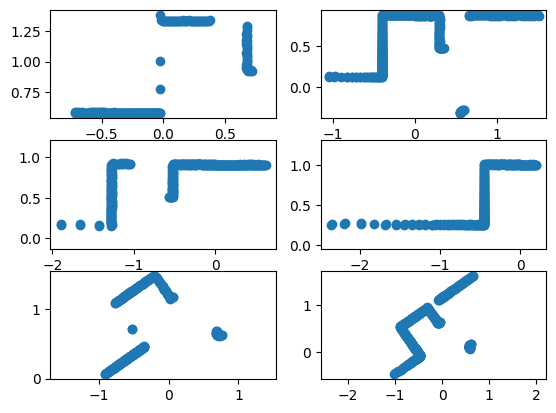

In [3]:
fig, axs = plt.subplots(3, 2)
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    x = testdata[i]['rho'] * np.cos(testdata[i]['theta'])
    y = testdata[i]['rho'] * np.sin(testdata[i]['theta'])
    axs[row_index, column_index].scatter(x, y)

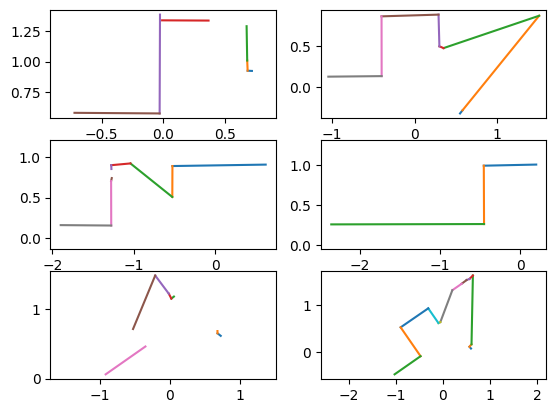

In [53]:
#sam = SplitAndMerge(line_point_dist_threshold=0.004, min_points_per_segment=4, min_seg_length=0.01) # OK for 1
#sam = SplitAndMerge(line_point_dist_threshold=0.001, min_points_per_segment=5, min_seg_length=0.01)  # OK for 2
sam = SplitAndMerge(line_point_dist_threshold=0.004, min_points_per_segment=4, min_seg_length=0.01)  # OK for 2

fig, axs = plt.subplots(3, 2)
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    x = testdata[i]['rho'] * np.cos(testdata[i]['theta'])
    y = testdata[i]['rho'] * np.sin(testdata[i]['theta'])
    alpha_a, r_a, segend, seglen, pointIdx_a = sam.extractLines(x[0], y[0])
    for j in range(segend.shape[0]):
        axs[row_index, column_index].plot([segend[j,0], segend[j,2]], [segend[j,1], segend[j,3]])

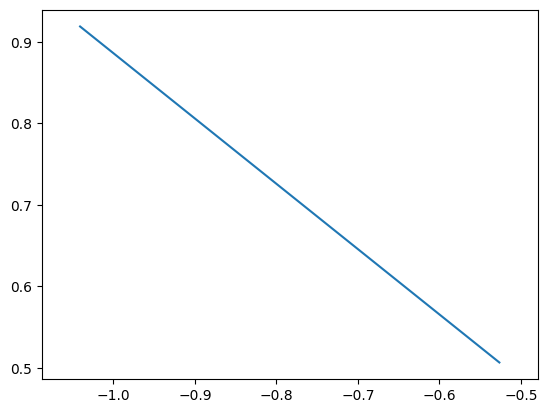

In [59]:
sam = SplitAndMerge(line_point_dist_threshold=0.004, min_points_per_segment=4, min_seg_length=0.01)

x = testdata[2]['rho'] * np.cos(testdata[2]['theta'])
y = testdata[2]['rho'] * np.sin(testdata[2]['theta'])
segstart = 0
segstart = 230
segend = 417
segend = 238

x = x[0][segstart:segend]
y = y[0][segstart:segend]

fig,ax = plt.subplots()
ax.axis('equal')
#plt.scatter (x, y)
alpha_a, r_a, segend, seglen, pointIdx_a = sam.extractLines(x, y)
for j in range(segend.shape[0]):
    ax.plot([segend[j,0], segend[j,2]], [segend[j,1], segend[j,3]])

In [62]:
len(x)

8

In [55]:
pointIdx_a

array([[  0, 186],
       [186, 230],
       [230, 237],
       [237, 255],
       [255, 259],
       [269, 273],
       [273, 335],
       [335, 341]])

In [7]:
from LidarSim.lidar_sim import LidarSimulator
lidar = LidarSimulator("square.stl")
point = [500, 300]
yaw = np.radians(0)
#plot_scan = lidar.get_lidar_points(point[0], point[1], yaw, theta=0, view_range=25)
plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)

In [8]:
# get carthesian coordinates
x = []
y = []
for alpha, r in plot_scan:
    x.append(r * np.cos(alpha)+ point[0])
    y.append(r * np.sin(alpha) + point[1])

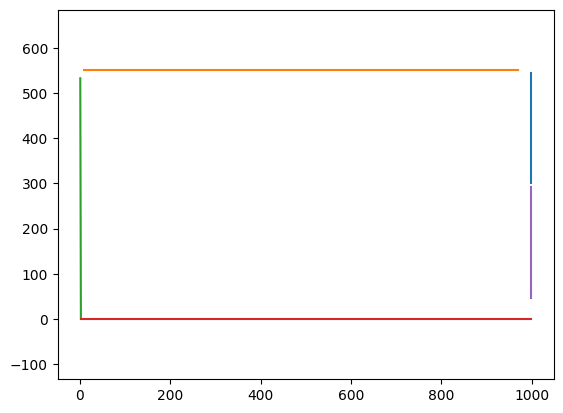

In [9]:
sam = SplitAndMerge(line_point_dist_threshold=0.005, min_points_per_segment=20)

fig,ax = plt.subplots()
ax.axis('equal')
#plt.scatter (x[211:329], y[211:329])
alpha_a, r_a, segend, seglen, pointIdx_a = sam.extractLines(x, y)
for j in range(segend.shape[0]):
    ax.plot([segend[j,0], segend[j,2]], [segend[j,1], segend[j,3]])

In [10]:
pointIdx_a

array([[  0,  26],
       [ 28, 153],
       [155, 211],
       [211, 329],
       [333, 359]])